In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.getcwd()

'/content'

In [ ]:
%%time
others = []

path = '/content/drive/MyDrive/Colab Notebooks/dataScreenshots_2/others'

#path = os.path.join(os.getcwd(), foldername)                    #define foldername

i = 0

for file in os.listdir(path):
    print(f"{file}")                                   # get every file in the folder
    i += 1
    #print(file)
    img = cv2.imread(os.path.join(path, file))                   # load the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # make it RGB (cv2 uses BGR)
    res = cv2.resize(gray, dsize=(150, 150))                   #resize it so all images are one size
    others.append(res) 
    if i >= 1000:                                               # number of images to load
      break

others = np.array(others)
others.shape

In [ ]:
screenshots = []

path = '/content/drive/MyDrive/Colab Notebooks/dataScreenshots_2/screenshots'

#path = os.path.join(os.getcwd(), foldername)                    #define foldername

i = 0

for file in os.listdir(path):                                   # get every file in the folder
    i += 1
    print(file,i)
    img = cv2.imread(os.path.join(path, file))                   # load the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # make it RGB (cv2 uses BGR)
    res = cv2.resize(gray, dsize=(150, 150))                   #resize it so all images are one size
    screenshots.append(res) 
    if i >= 1000:                                               # number of images to load
      break
screenshots = np.array(screenshots)
screenshots.shape

In [13]:
y_others = np.array([[0] for x in range(len(others))])

y_screenshots = np.array([[1] for x in range(len(screenshots))])

In [14]:
y_screenshots.shape

(1000, 1)

In [15]:
y=np.vstack((y_others,y_screenshots))
y.shape

(2000, 1)

In [16]:
X=np.vstack((others,screenshots))
X.shape

(2000, 150, 150)

In [17]:
X_scaled = X/255.

In [18]:
X_expanded = np.expand_dims(X_scaled, axis = -1)

In [19]:
new_random_indices = np.random.permutation(len(X_expanded))
X_reshuffled = X_expanded[new_random_indices]
y_reshuffled = y[new_random_indices]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_reshuffled,y_reshuffled)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1500, 150, 150, 1), (500, 150, 150, 1), (1500, 1), (500, 1))

In [22]:
from tensorflow.keras import layers,Sequential

In [23]:
def initialize_model():
    model = Sequential()

    # Convolutional layer and maxpool layer 1
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
    model.add(layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 2
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 3
    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPool2D(4,4))

    # Convolutional layer and maxpool layer 4
    #model.add(layers.Conv2D(128,(3,3),activation='relu'))
    #model.add(layers.MaxPool2D(2,2))

    # This layer flattens the resulting image array to 1D array
    model.add(layers.Flatten())

    # Hidden layer with 512 neurons and Rectified Linear Unit activation function 
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16,activation='relu'))

    # Output layer with single neuron which gives 1 for Screenshots or 0 for others 
    #Here we use sigmoid activation function which makes our model output to lie between 0 and 1
    model.add(layers.Dense(1,activation='sigmoid'))
    # compile
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                 )
    return model

In [24]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [25]:
#steps_per_epoch = train_imagesize/batch_size
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train, y_train, validation_split = 0.2,
          batch_size=32, # Too small --> no generalization. Too large --> compute slowly
          epochs=100,
          callbacks=[es],
          verbose=1
         )

Epoch 1/100
38/38 [==============================] - 3s 25ms/step - loss: 0.5720 - accuracy: 0.7050 - val_loss: 0.2835 - val_accuracy: 0.8967
Epoch 2/100
38/38 [==============================] - 1s 15ms/step - loss: 0.2657 - accuracy: 0.9033 - val_loss: 0.1647 - val_accuracy: 0.9433
Epoch 3/100
38/38 [==============================] - 1s 15ms/step - loss: 0.1676 - accuracy: 0.9375 - val_loss: 0.1163 - val_accuracy: 0.9600
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 0.1318 - accuracy: 0.9633 - val_loss: 0.0803 - val_accuracy: 0.9833
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 0.1343 - accuracy: 0.9583 - val_loss: 0.1108 - val_accuracy: 0.9700
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0912 - accuracy: 0.9717 - val_loss: 0.0855 - val_accuracy: 0.9767
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0795 - accuracy: 0.9742 - val_loss: 0.0819 - val_accuracy: 0.9767
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

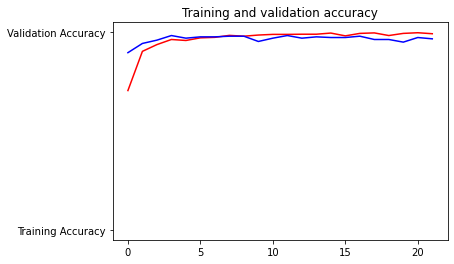

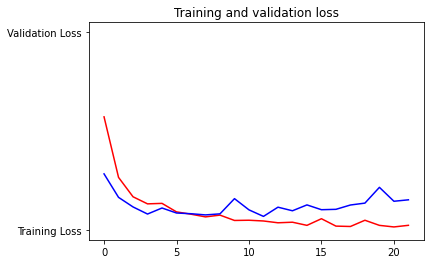

In [26]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [27]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9880


[0.0629834458231926, 0.9879999756813049]

In [44]:
X_test.shape,y_test.shape

((500, 150, 150, 1), (500, 1))

In [43]:
X_test=X_test.reshape(500,150,150,1)

In [48]:
model.predict(X_test)[0]

array([0.00036579], dtype=float32)

In [56]:

model.predict(X_test)[1]

array([0.9999988], dtype=float32)

In [65]:
def model_predict(index):
    plt.imshow(X_test[index].reshape(150,150), cmap = 'gray')
    val = round(model.predict(X_test)[index][0])
    if val:
        print("predicted output: screenshot")
    else:
        print('predicted output: others')
    expected_output = y_test[index]
    if expected_output:
        print("expected output: screenshot")
    else:
        print('expected output: others')

In [68]:
len(X_test)

500

predicted output: screenshot
expected output: screenshot


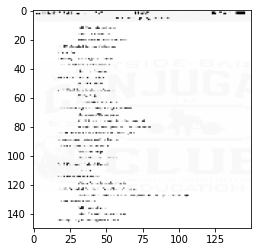

In [76]:
#range(0,499)
model_predict(128)